# Data Science Job Salaries
#### Salaries of jobs in the Data Science domain

#### # import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#### import dataset

In [2]:
# file path
path = "dsSalaries\ds_salaries.csv"

# read dataset
df = pd.read_csv(path)

# view data
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


#### column names

In [3]:
columnNames = df.columns
allColumnNames = [x for x in columnNames]
print(f"Dataset contains the following columns: \n\n {allColumnNames}")

Dataset contains the following columns: 

 ['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


#### replace Country Code in company_location and employee_residence by country name

In [4]:
# country table part
pathCountry = "dsSalaries\countryCode.csv"

# read dataset
dfCountry = pd.read_csv(pathCountry, encoding='latin1')

# view data
dfCountry.head(2)

,Country,Code
0,Afghanistan,AF
1,Åland Islands,AX


In [5]:
# join on company_location
df = df.merge(dfCountry.rename({"Country" : "companyLocation", "Code" : "company_location"}, 
                               axis = 1), on = "company_location", how = 'left')
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan


In [6]:
# join on employee_residence
df = df.merge(dfCountry.rename({"Country" : "employeeResidence", "Code" : "employee_residence"}, 
                               axis = 1), on = "employee_residence", how = 'left')
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation,employeeResidence
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany,Germany
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan,Japan


#### replace PT to Part-time, FT  to Full-time, CT to Contract and FL to Freelance in employment_type column


In [7]:
df.employment_type.replace(["PT", "FT", "CT", "FL"],
                           ["Part-time", "Full-time", "Contract", "Freelance"], inplace = True)
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation,employeeResidence
0,0,2020,MI,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany,Germany
1,1,2020,SE,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan,Japan


#### replace  EN to Entry-level, MI to Mid-level, SE to Senior-level, EX to Executive-level in experience_level column

In [8]:
df.experience_level.replace(["EN", "MI", "SE", "EX"],
                           ["Entry-level", "Mid-level", "Senior-level", "Executive-level"], inplace = True)
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation,employeeResidence
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany,Germany
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Japan,Japan


#### replace  0 to No remote work, 50 to Partially remote and 100 to Fully remote in remote_ratio column

In [9]:
df.remote_ratio.replace([0, 50, 100],
                           ["No remote", "Partially remote", "Fully remote"], inplace = True)
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation,employeeResidence
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,No remote,DE,L,Germany,Germany
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,S,Japan,Japan


#### replace S to Small, M  to Medium, L to Large in company_size column

In [10]:
df.company_size.replace(["S", "M", "L"],
                           ["Small", "Medium", "Large"], inplace = True)
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,companyLocation,employeeResidence
0,0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,No remote,DE,Large,Germany,Germany
1,1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,Small,Japan,Japan


#### drop 'Unnamed: 0', employee_residence and company_location

In [11]:
df.drop(["Unnamed: 0","employee_residence", "company_location"], axis = 1, inplace = True)

# view data
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,companyLocation,employeeResidence
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,No remote,Large,Germany,Germany
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,No remote,Small,Japan,Japan


#### total rows and column

In [12]:
noRows = df.shape[0]
noCols = df.shape[1]
f"Dataset contains {noRows} rows and {noCols} columns."

'Dataset contains 607 rows and 11 columns.'

#### statistical summary on salary in usd

In [13]:
df.describe().salary_in_usd.to_frame()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


#### null values

In [14]:
df.isna().sum().to_frame()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
remote_ratio,0
company_size,0
companyLocation,0


#### data info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   work_year          607 non-null    int64 
 1   experience_level   607 non-null    object
 2   employment_type    607 non-null    object
 3   job_title          607 non-null    object
 4   salary             607 non-null    int64 
 5   salary_currency    607 non-null    object
 6   salary_in_usd      607 non-null    int64 
 7   remote_ratio       607 non-null    object
 8   company_size       607 non-null    object
 9   companyLocation    607 non-null    object
 10  employeeResidence  607 non-null    object
dtypes: int64(3), object(8)
memory usage: 56.9+ KB


#### categoriacl columns

In [16]:
catColumns = [x for x in df.columns  if df[x].dtype == "object"]
pd.DataFrame(catColumns)

,0
0,experience_level
1,employment_type
2,job_title
3,salary_currency
4,remote_ratio
5,company_size
6,companyLocation
7,employeeResidence


#### total types of data science job titles captured

In [17]:
pd.DataFrame(df.job_title.unique()).count()[0]

50

#### average salary and count by job title

In [18]:
# job title and frequency
# jobTitle, fequency = np.unique(df.job_title, return_counts = True)
# pd.Series(dict(zip(jobTitle, fequency))).sort_values(ascending = False).to_frame()

df1 = df.groupby("job_title").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("job_title").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "job_title", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "noEmployee", ascending = False)
df3.reset_index(inplace = True)
df3

,job_title,avgSalary,noEmployee
0,Data Scientist,108187.832168,143
1,Data Engineer,112725.000000,132
2,Data Analyst,92893.061856,97
3,Machine Learning Engineer,104880.146341,41
4,Research Scientist,109019.500000,16
5,Data Science Manager,158328.500000,12
6,Data Architect,177873.909091,11
7,Big Data Engineer,51974.000000,8
8,Machine Learning Scientist,158412.500000,8
9,Director of Data Science,195074.000000,7


<AxesSubplot:xlabel='noEmployee', ylabel='job_title'>

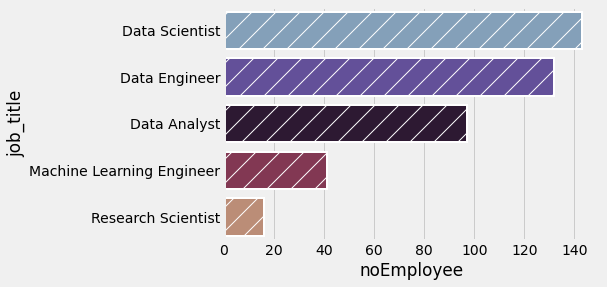

In [19]:
df3 = df3[0:5]
sns.barplot(y = "job_title", x = "noEmployee", data = df3,
              palette = 'twilight',  lw = 2, ec = 'white', hatch = '/')

#### total unique company location captured

In [20]:
pd.DataFrame(df.companyLocation.unique()).count()[0]

50

#### average salary and count by company location

In [21]:
df1 = df.groupby("companyLocation").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("companyLocation").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "companyLocation", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "noEmployee", ascending = False)
df3.reset_index(inplace = True)
df3

,companyLocation,avgSalary,noEmployee
0,United States of America (the),144055.261972,355
1,United Kingdom of Great Britain and Northern I...,81583.042553,47
2,Canada,99823.733333,30
3,Germany,81887.214286,28
4,India,28581.750000,24
5,France,63970.666667,15
6,Spain,53060.142857,14
7,Greece,52293.090909,11
8,Japan,114127.333333,6
9,Netherlands (the),54945.750000,4


<AxesSubplot:xlabel='noEmployee', ylabel='companyLocation'>

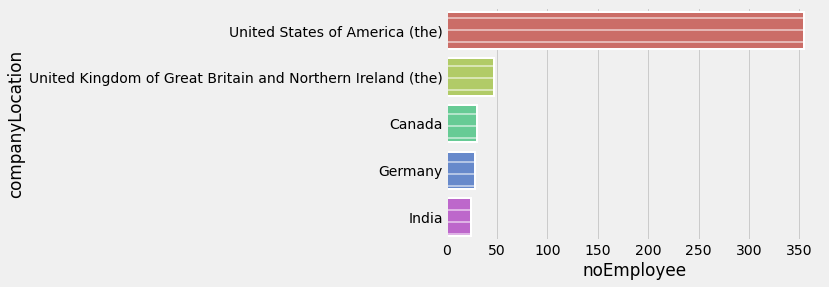

In [22]:
df3 = df3[0:5]
sns.barplot(y = "companyLocation", x = "noEmployee", data = df3,
              palette = 'hls',  lw = 2, ec = 'white', hatch = '-')

#### total unique employee by residence captured

In [23]:
pd.DataFrame(df.employeeResidence.unique()).count()[0]

57

#### average salary and count by employee residence

In [24]:
df1 = df.groupby("employeeResidence").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("employeeResidence").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "employeeResidence", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "noEmployee", ascending = False)
df3.reset_index(inplace = True)
df3

,employeeResidence,avgSalary,noEmployee
0,United States of America (the),149194.117470,332
1,United Kingdom of Great Britain and Northern I...,81403.159091,44
2,India,37322.333333,30
3,Canada,97085.310345,29
4,Germany,85552.560000,25
5,France,59886.611111,18
6,Spain,57593.400000,15
7,Greece,56331.230769,13
8,Japan,103537.714286,7
9,Pakistan,27462.833333,6


<AxesSubplot:xlabel='noEmployee', ylabel='employeeResidence'>

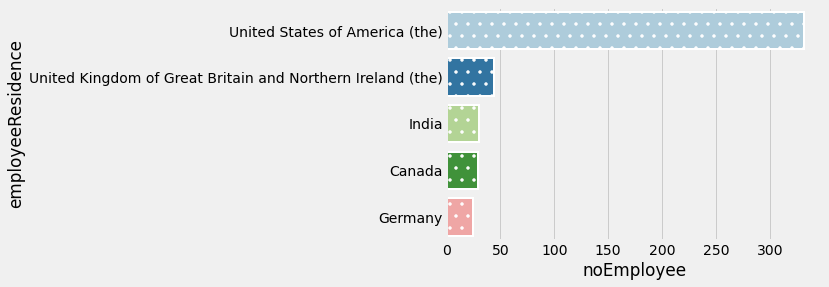

In [25]:
df3 = df3[0:5]
sns.barplot(y = "employeeResidence", x = "noEmployee", data = df3,
              palette = 'Paired',  lw = 2, ec = 'white', hatch = '.')

#### average salary and count by company size

In [26]:
df1 = df.groupby("company_size").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("company_size").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "company_size", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "avgSalary", ascending = False)
df3.reset_index(inplace = True)
df3

,company_size,avgSalary,noEmployee
0,Large,119242.994949,198
1,Medium,116905.466258,326
2,Small,77632.674699,83


<AxesSubplot:xlabel='company_size', ylabel='avgSalary'>

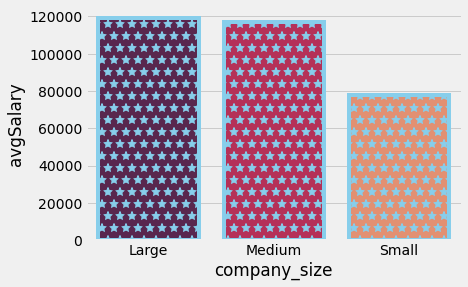

In [27]:
sns.barplot(x = "company_size", y = "avgSalary", data = df3,
              palette = 'rocket', lw = 4, ec = 'skyblue', hatch = '*')

#### average salary and count by experience_level

In [28]:
df1 = df.groupby("experience_level").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("experience_level").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "experience_level", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "avgSalary", ascending = False)
df3.reset_index(inplace = True)
df3

,experience_level,avgSalary,noEmployee
0,Executive-level,199392.038462,26
1,Senior-level,138617.292857,280
2,Mid-level,87996.056338,213
3,Entry-level,61643.318182,88


<AxesSubplot:xlabel='experience_level', ylabel='avgSalary'>

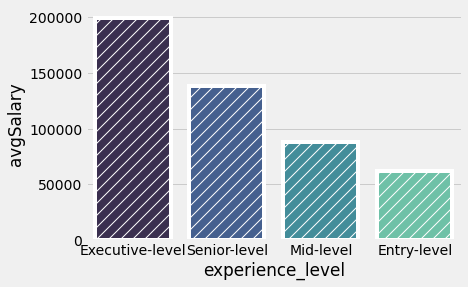

In [29]:
sns.barplot(x = "experience_level", y = "avgSalary",  data = df3,
              palette = 'mako', lw = 4, ec = 'white', hatch = '//')

#### average salary and count by remote_ratio

In [30]:
df1 = df.groupby("remote_ratio").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("remote_ratio").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "remote_ratio", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "avgSalary", ascending = False)
df3.reset_index(inplace = True)
df3

,remote_ratio,avgSalary,noEmployee
0,Fully remote,122457.454068,381
1,No remote,106354.622047,127
2,Partially remote,80823.030303,99


<AxesSubplot:xlabel='remote_ratio', ylabel='avgSalary'>

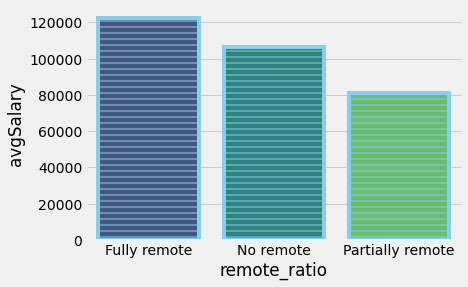

In [31]:
sns.barplot(x = "remote_ratio", y = "avgSalary",  data = df3,
            order = df.remote_ratio.value_counts().index[::],
              palette = 'viridis', lw = 4, ec = 'skyblue', hatch = '--')

#### average salary and count by employment_type

In [32]:
df1 = df.groupby("employment_type").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("employment_type").count()['work_year'].to_frame()
df3 = df1.merge(df2, on = "employment_type", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "work_year" : "noEmployee"}, 
    axis = 1).sort_values(by = "avgSalary", ascending = False)
df3.reset_index(inplace = True)
df3

,employment_type,avgSalary,noEmployee
0,Contract,184575.000000,5
1,Full-time,113468.073129,588
2,Freelance,48000.000000,4
3,Part-time,33070.500000,10


<AxesSubplot:xlabel='employment_type', ylabel='avgSalary'>

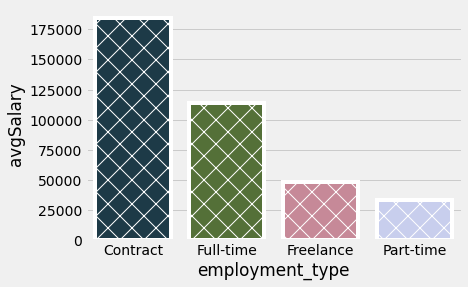

In [33]:
sns.barplot(x = "employment_type", y = "avgSalary",  data = df3,
              palette = 'cubehelix', lw = 4, ec = 'white', hatch = 'x')

#### average salary and count by work_year

In [34]:
df1 = df.groupby("work_year").mean()['salary_in_usd'].to_frame()
df2 = df.groupby("work_year").count()['employment_type'].to_frame()
df3 = df1.merge(df2, on = "work_year", how = "left").rename(
    {"salary_in_usd" : "avgSalary", "employment_type" : "noEmployee"}, 
    axis = 1).sort_values(by = "avgSalary", ascending = False)
df3.reset_index(inplace = True)
df3

,work_year,avgSalary,noEmployee
0,2022,124522.006289,318
1,2021,99853.792627,217
2,2020,95813.000000,72


<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

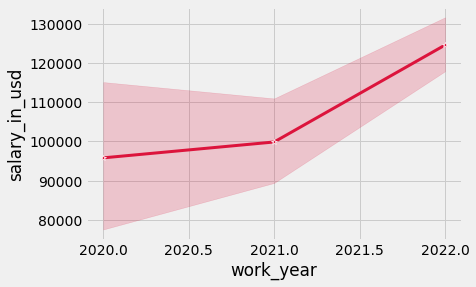

In [35]:
sns.lineplot(x = "work_year", y = "salary_in_usd", data = df, marker = '*', 
             color = "crimson", lw = 3)


#### export cleaned dataset for further visualization

In [36]:
path = path = "dsSalaries\dsSalariesCleaned.csv"
df.to_csv(path, index = True)